## Importing librairies

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

#Used to plot on a map
import geopandas as gpd
import contextily as cx
import xyzservices.providers as xyz
from shapely.geometry import Point

sns.set_theme()

## Importing the 2019-2020 full dataset

In [3]:
df = pd.read_csv('data/merged_data_2005_2020.csv', sep = ';')
df = df.drop('Unnamed: 0', axis = 1)

D:\DataScience\Anaconda\envs\my_env\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (9,22,24,25,26,28,38,39) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## Replacing long and lat value types

In [7]:
df.lat = df.lat.str.replace(',','.')
df.lat = df.lat.astype('float')

df.long = df.long.str.replace(',','.')
df.long = df.long.astype('float')

## Removing wrong values

In [28]:
# Looking for extreme values manually
df[['lat', 'long']][((df['dep']=='75') | (df['dep']=='92') | (df['dep']=='93') | (df['dep']=='94'))& (df['catv']==1)].sort_values(by = 'lat', ascending= True)

# Remove line with lat = 48.000000 (2134218)
# Remove line with lat = 50.581490 (2130041)
# Remove line with lat = 3.39700 (2132627)

lat      long
2334487  48.697130  2.552310
2317634  48.713369  2.537930
2328633  48.715386  2.537257
2273666  48.719070  2.545410
2298894  48.725264  2.576485
...            ...       ...
2136136        NaN       NaN
2136142        NaN       NaN
2136157        NaN       NaN
2136159        NaN       NaN
2136160        NaN       NaN

[3640 rows x 2 columns]

In [24]:
# Remove wrong values at the chosen indexes
df = df.drop(index = [2134218, 2130041, 2132627])

In [34]:
# Replace NaN for lat and long
df.fillna({x:0 for x in ['lat', 'long']}, inplace= True)

In [53]:
# Change the type of 'dep' to string (mix of int and string)
df.dep = df.dep.astype('str')

## Ploting the bike accidents in Paris and around

Data is filtered on:
- catv = 1 (bicycle)
- dep:
  - Frist graph: 75 (Paris)
  - Second graph: 75 (Paris), 92 (Hauts-de-Seine), 93 (Seine-Saint-Denis) and 94 (Val-de-Marne)

The CRS (Coordinate Reference System) in our dataset is not the default one, it must be changed with EPSG:4326 (WGS84).

The background image is provided by [CyclOSM](https://www.cyclosm.org/#map=14/48.8582/2.3466/cyclosm), using the [xyzservices](https://xyzservices.readthedocs.io/en/stable/index.html) library.

### Key indicators

In [57]:
sum_Paris = df[(df['dep']=='75')& (df['catv']==1)].shape[0]
sum_Paris_plus = df[((df['dep']=='75') | (df['dep']=='92') | (df['dep']=='93') | (df['dep']=='94'))& (df['catv']==1)].shape[0]

print(sum_Paris, "bicycle accidents in Paris between 2005-2020")
print(sum_Paris_plus, "bicycle accidents in Paris and around (92, 93, 94) between 2005-2020")

13810 bicycle accidents in Paris between 2005-2020
20432 bicycle accidents in Paris and around (92, 93, 94) between 2005-2020


### Accidents in Paris

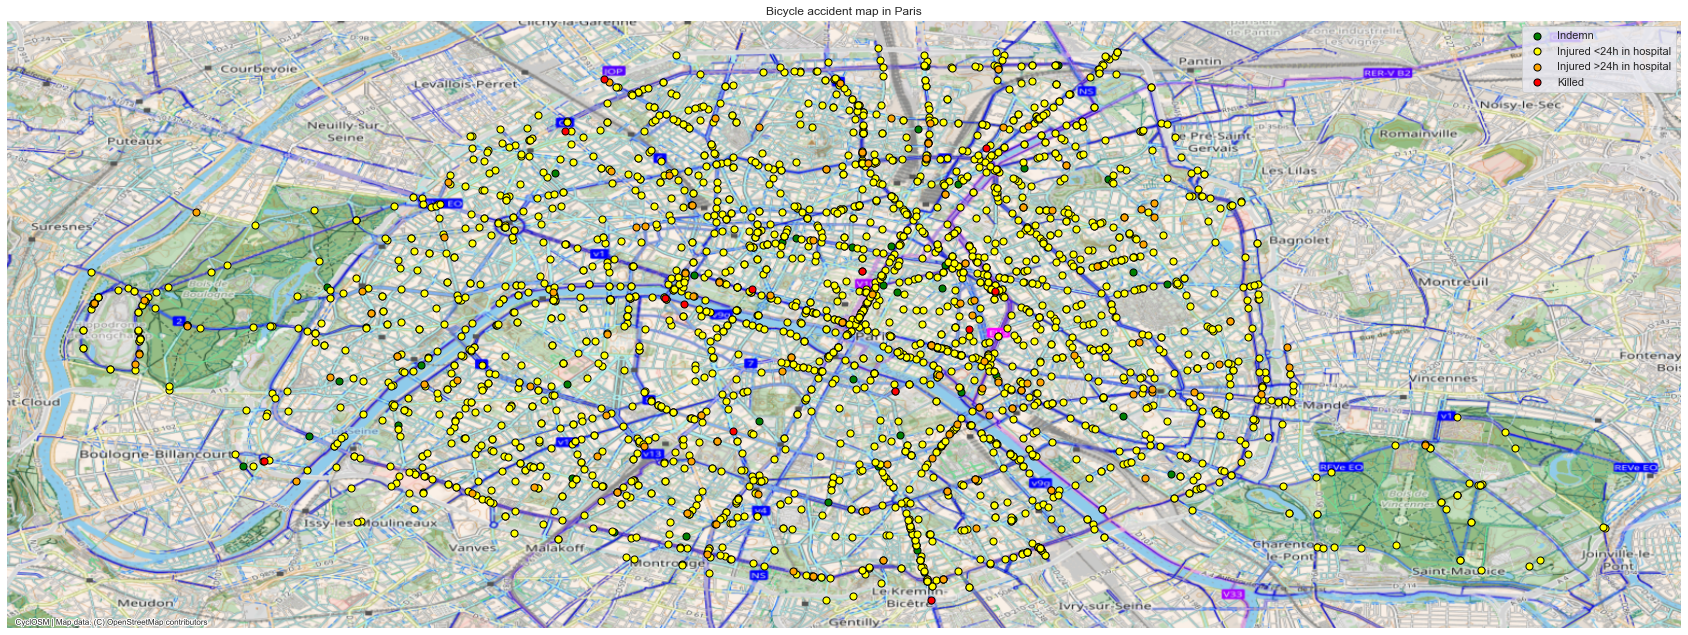

In [58]:
#Filter our dataset on Paris and bicycles
df_m = df[(df['dep']=='75') & (df['catv']==1)]
df_m = df_m[(df_m['lat']!=0.0) & (df_m['long']!=0.0)]

#Remove wrong coordinates
df_m = df_m[(df_m['lat']!=0.0) & (df_m['long']!=0.0)].dropna(subset=['lat', 'long'], axis=0)

#Create our points from long and lat coordinates
geometry = [Point(xy) for xy in zip(df_m['long'], df_m['lat'])]
geo_df = gpd.GeoDataFrame(df_m, geometry=geometry)

#Plot the accidents
figure, ax = plt.subplots(figsize=(30,30))
#ax.set_aspect(2)
plt.axis('off')
geo_df[geo_df['grav']==1].plot(ax=ax, markersize=50, color='green', label='Indemn', linewidth = 1, edgecolor = 'black')
geo_df[geo_df['grav']==4].plot(ax=ax, markersize=50, color='yellow', label='Injured <24h in hospital', linewidth = 1, edgecolor = 'black')
geo_df[geo_df['grav']==3].plot(ax=ax, markersize=50, color='orange', label='Injured >24h in hospital', linewidth = 1, edgecolor = 'black')
geo_df[geo_df['grav']==2].plot(ax=ax, markersize=50, color='red', label='Killed', linewidth = 1, edgecolor = 'black')
cx.add_basemap(ax, crs = 'EPSG:4326', source = xyz.CyclOSM)
plt.title("Bicycle accident map in Paris")
plt.legend();

### Accidents in Paris and around

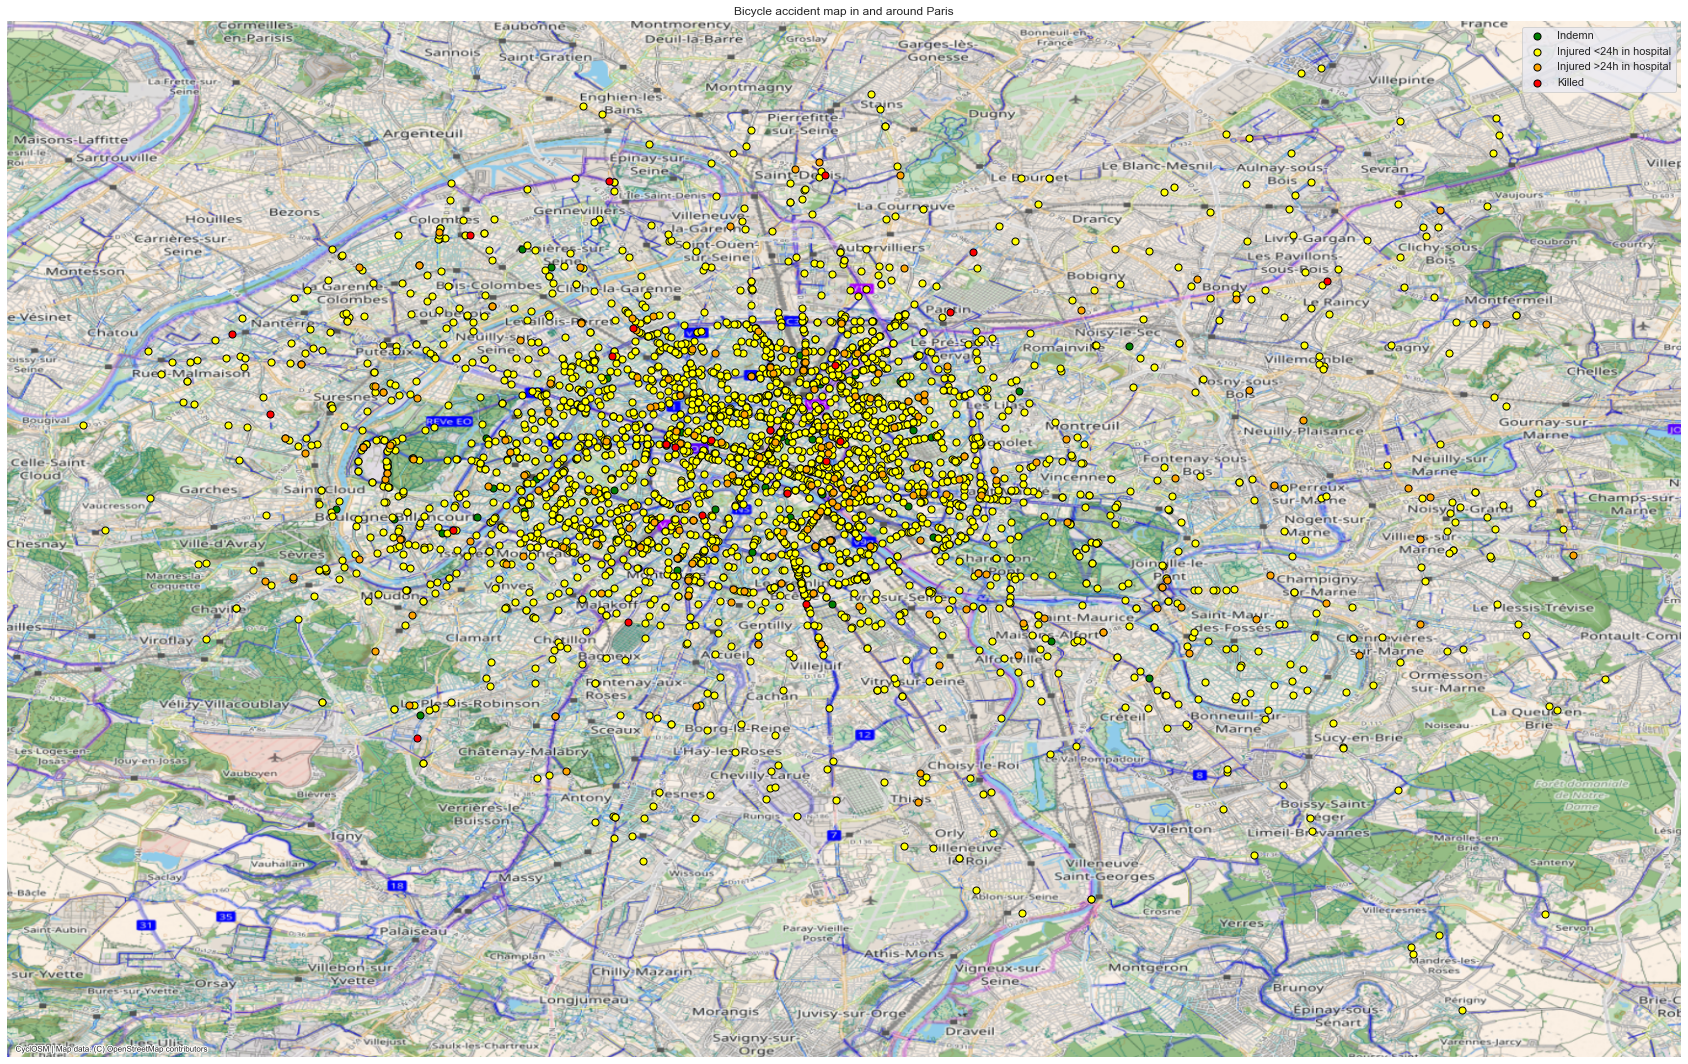

In [59]:
#Filter our dataset on Paris (and close sectors) and bicycles
df_m = df[((df['dep']=='75') | (df['dep']=='92') | (df['dep']=='93') | (df['dep']=='94'))& (df['catv']==1)]

#Remove wrong coordinates
df_m = df_m[(df_m['lat']!=0.0) & (df_m['long']!=0.0)].dropna(subset=['lat', 'long'], axis=0)

#Create our points from long and lat coordinates
geometry = [Point(xy) for xy in zip(df_m['long'], df_m['lat'])]
geo_df = gpd.GeoDataFrame(df_m, geometry=geometry)

#Plot the accidents
figure, ax = plt.subplots(figsize=(30,30))
#ax.set_aspect(2)
plt.axis('off')
geo_df[geo_df['grav']==1].plot(ax=ax, markersize=50, color='green', label='Indemn', linewidth = 1, edgecolor = 'black')
geo_df[geo_df['grav']==4].plot(ax=ax, markersize=50, color='yellow', label='Injured <24h in hospital', linewidth = 1, edgecolor = 'black')
geo_df[geo_df['grav']==3].plot(ax=ax, markersize=50, color='orange', label='Injured >24h in hospital', linewidth = 1, edgecolor = 'black')
geo_df[geo_df['grav']==2].plot(ax=ax, markersize=50, color='red', label='Killed', linewidth = 1, edgecolor = 'black')
cx.add_basemap(ax, crs = 'EPSG:4326', source = xyz.CyclOSM)
plt.title("Bicycle accident map in and around Paris")
plt.legend();